In [1]:
import pandas as pd

In [2]:
red_wine = pd.read_csv("winequality-red.csv", delimiter=";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
red_wine['quality'].value_counts(sort=False)

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [5]:
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']) # turn all values in these columns between 0 and 1
)

# Create X & y
X = red_wine.drop('quality', axis=1)
y = red_wine['quality'].to_numpy()
y = np.reshape(y, (-1,1))

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [6]:
import tensorflow as tf

# Build a neural netrwork model to fit on our normalized data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
red_wine_n = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
red_wine_n.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.mse, metrics=['mse'])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
history = red_wine_n.fit(X_train_normal, y_train, epochs=1000, callbacks=[callback], verbose=0)

In [7]:
# Evaluate our model
red_wine_n.evaluate(X_test_normal, y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.3553 - mse: 0.3553


[0.35529810190200806, 0.35529810190200806]

Text(0.5, 0, 'epochs')

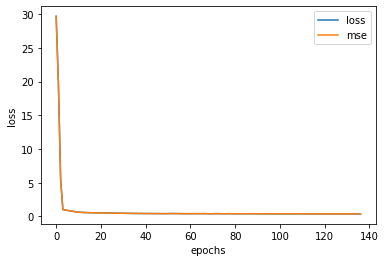

In [8]:
import matplotlib.pyplot as plt

# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [19]:
y_preds = red_wine_n.predict(X_test_normal)
y_preds = np.around(y_preds, decimals=2)

In [21]:
y_result =  pd.DataFrame()
y_result['real'] = y_test.tolist()
y_result['pred'] = y_preds.tolist()
y_result.head(20)

,real,pred
0,[6],[5.550000190734863]
1,[5],[5.170000076293945]
2,[6],[5.599999904632568]
3,[5],[5.260000228881836]
4,[6],[5.800000190734863]
5,[5],[5.170000076293945]
6,[5],[5.050000190734863]
7,[5],[4.889999866485596]
8,[5],[5.900000095367432]
9,[6],[5.809999942779541]
